# [word2vec](https://wikidocs.net/22660)
- 대표적인 워드 임베딩 기법
- **원핫 인코딩 결과 벡터의 문제점**: 입력 길이에 따라 벡터의 크기가 늘어나는 문제 + 유사도를 계산할 수 없는 문제
- 따라서, 원핫 벡터를 워드 임베딩을 통해 임베딩 벡터로 만들어 문제 해결
<br/>

- 목적: 밀집 벡터로 변환함으로써 유사도 계산 or 연산 수행, 다른 작업에서 사용할 수 있는 전이학습 지원

- CBOW와 Skip-gram 두 가지 종류

<br/><br/>

## CBOW(Continuous Bag of Words)
- 주변에 있는 단어들(Context word)을 입력으로 중간에 있는 단어(center word)를 예측하는 방법

- 윈도우(window): 중심 단어를 예측하기 위해 주변 몇 개의 단어들을 사용할지에 대한 범위
- ex) 윈도우 크기: 2, 중심 단어: sat이면 앞의 fat과 cat, 뒤의 on, the를 입력으로 사용 <br/>

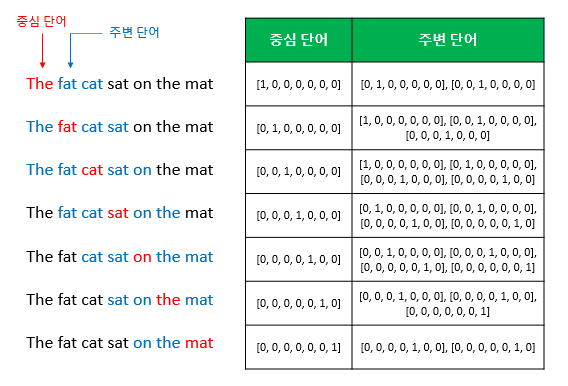<br/>
- 슬라이딩 윈도우:  윈도우를 옆으로 움직여 주변 단어와 중심 단어를 변경해가며 데이터 셋을 만드는 방법 <br/><br/><br/>

### CBOW의 구조
<br/>

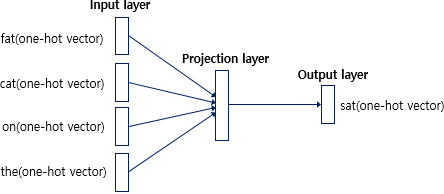<br/>
- 입력: 주변 단어들의 원핫벡터
- projection layer: CBOW의 은닉층, 크기는 M, 일반적인 은닉층과 달리 활성화 함수가 X, 룩업 테이블이라는 연산을 담당하는 층
- 출력: 예측하고자 하는 중간 단어의 원핫벡터

<br/><br/><br/>

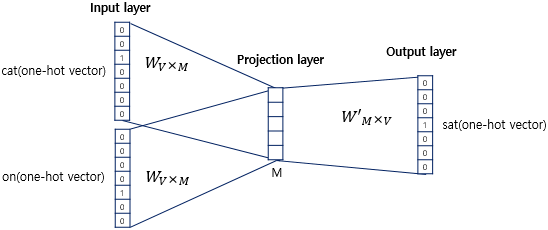<br/>
- V는 단어 집합의 크기
- projection layer의 크기 M은 임베딩하고 난 벡터의 차원이 됨, 여기서는 5
- 입력층과 투사층 사이의 가중치 W는 V × M 행렬, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬 
- **W와 W'는 전치 행렬이 아님** 둘은 랜덤값을 가지는, 행과 열의 크기만 반대인 행렬

<br/> <br/><br/>

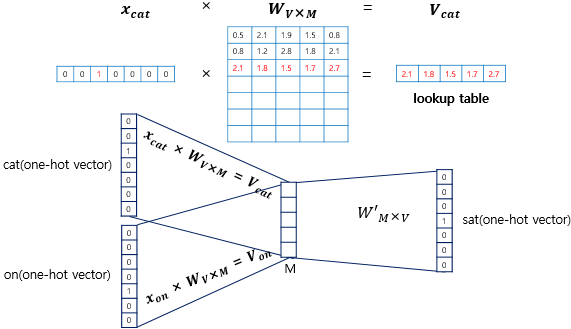<br/>
- 입력 벡터(V)와 가중치 W 행렬의 곱 = W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일 -> 룩업 테이블(lookup table)
- **투사층**: 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 **결과 벡터들의 평균 벡터**를 구함 -> skip-gram과 차이

In [1]:
# gensim
import gensim.downloader as api

wv = api.load('glove-wiki-gigaword-50')   # 다운로드 크기가 적은 모델, 50은 임베딩 벡터의 크기
type(wv)

[=================================================-] 98.9% 65.3/66.0MB downloaded


gensim.models.keyedvectors.KeyedVectors

In [2]:
# 단어 king의 벡터
vec_king = wv['king']
print('#Size of the vector:', len(vec_king))
print('#Vector for king:', vec_king)

#Size of the vector: 50
#Vector for king: [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [3]:
# 단어 유사도 계산
# gensim은 코사인 유사도 기반
print(wv.similarity('king', 'man'), 'vs', wv.similarity('king', 'woman'))
print(wv.similarity('queen', 'man'), 'vs', wv.similarity('queen', 'woman'))

0.53093773 vs 0.41133785
0.53667 vs 0.60031056


In [4]:
# most_similar(): 주어진 단어 리스트와 가장 유사하거나 거리가 먼 단어들을 구할 수 있음
# positive면 유사한 단어, negative면 먼 단어

print('미니밴에 가까운 차:', wv.most_similar(positive=['car', 'minivan'], topn=3))
print('여성, 왕에는 가까우면서 남성과는 먼 단어:', 
      wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
print('breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어:', 
      wv.doesnt_match("breakfast cereal dinner lunch".split()))   # doesnt_match(): 주어진 단어 중 다른 단어들과 가장 거리가 먼 단어

미니밴에 가까운 차: [('truck', 0.9100274443626404), ('suv', 0.904007613658905), ('jeep', 0.8619830012321472)]
여성, 왕에는 가까우면서 남성과는 먼 단어: [('queen', 0.8523604273796082)]
breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어: cereal


In [6]:
print('남성, 귀족과 가까우면서 왕과는 먼 단어: ', wv.most_similar(positive=['man', 'nobility'], negative=['king'], topn=3))
print('기쁨, 슬픔과 가까운 단어: ', wv.most_similar(positive=['happiness', 'sadness'], topn=3))

남성, 귀족과 가까우면서 왕과는 먼 단어:  [('aristocratic', 0.6982579827308655), ('middle-aged', 0.6796597242355347), ('collar', 0.670455813407898)]
기쁨, 슬픔과 가까운 단어 [('sorrow', 0.8897840976715088), ('joy', 0.851984977722168), ('anguish', 0.84639972448349)]


In [12]:
print('코로나, 질병과 가까운 단어: ', wv.most_similar(positive=['corona', 'disease'], topn=5))

코로나, 질병과 가까운 단어:  [('virus', 0.730175256729126), ('hepatitis', 0.7260729074478149), ('cancer', 0.7152099013328552), ('infection', 0.6947943568229675), ('prostate', 0.6832574605941772)]


In [13]:
# distance(): 유사도의 반대인 거리를 리턴
# n_similarity(): 단어집합 간의 유사도 계산
print("distance between cat and dog: {:.2f}".format(wv.distance("cat", "dog")))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['japanese', 'restaurant'])))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['korean', 'restaurant'])))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['french', 'restaurant'])))

distance between cat and dog: 0.08
0.5375
0.5627
0.4377


In [16]:
print("{:.4f}".format(wv.n_similarity(['infra', 'service'], ['korea'])))
print("{:.4f}".format(wv.n_similarity(['infra', 'service'], ['japan'])))

0.2967
0.2794


C:\Users\ing06\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ing06\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


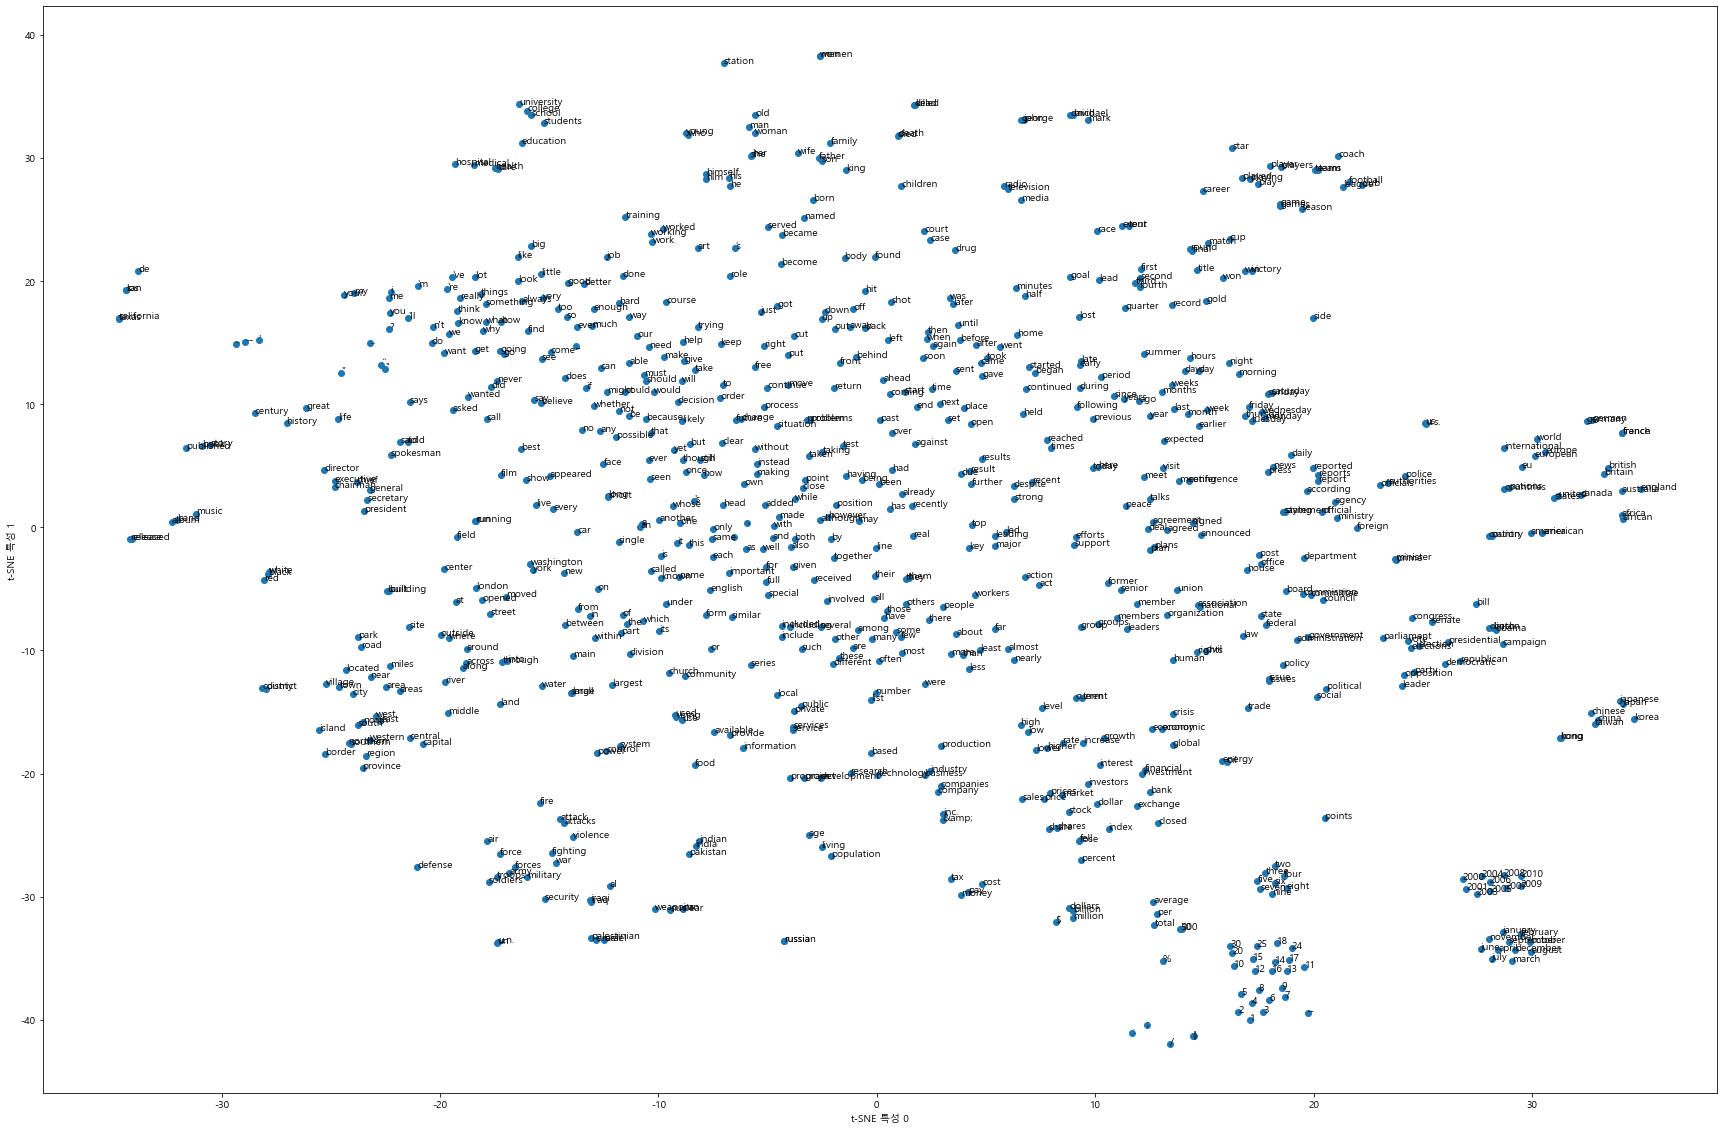

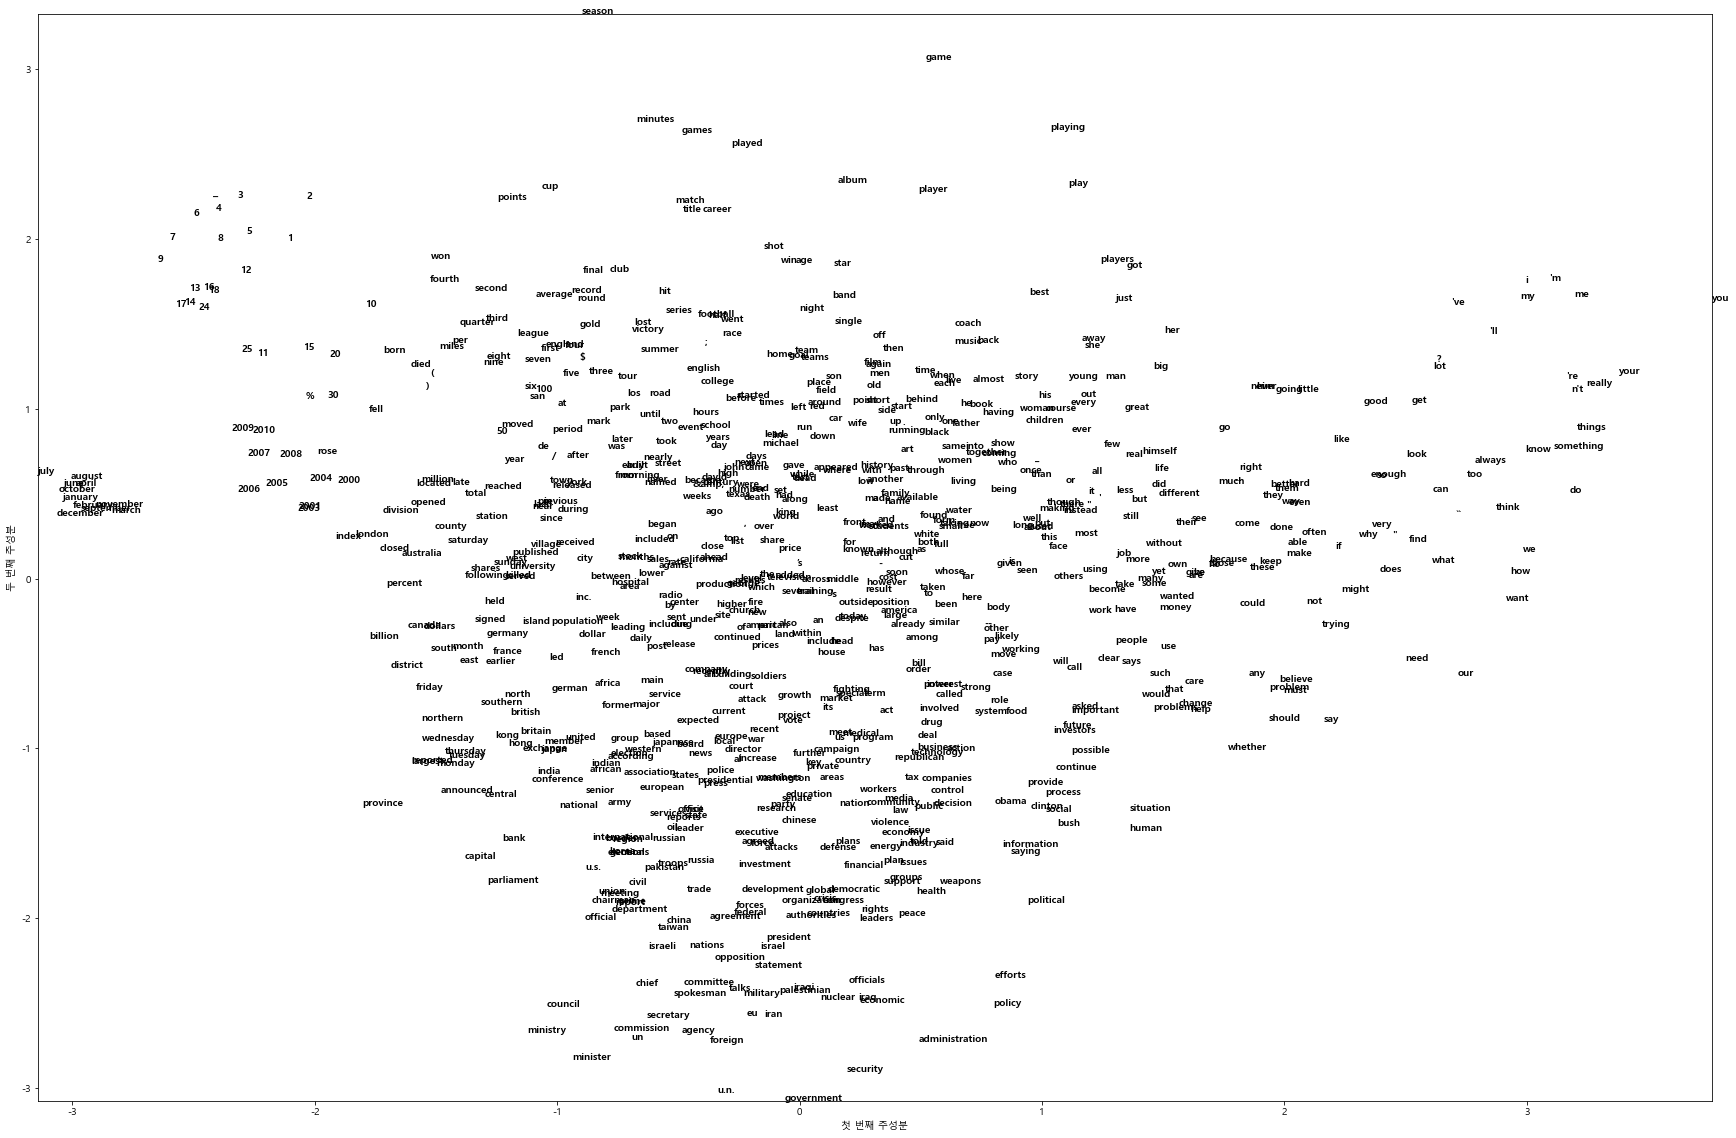

In [53]:
# tsne와 pca를 이용한 시각화

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()    # 한글 깨짐 방지
rc('font', family=font_name)

def show_tsne():
    tsne = TSNE(n_components=2)
    X = tsne.fit_transform(X_show)

    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
    plt.figure(figsize=(30, 20))
    #ax = plt.figure().add_subplot(1, 1, 1)    # 행 개수, 열 개수, 인덱스
    plt.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        plt.annotate(word, pos, fontsize=10)

    plt.xlabel("t-SNE 특성 0")
    plt.ylabel("t-SNE 특성 1")
    plt.show()


def show_pca():
    pca = PCA(n_components=2)
    pca.fit(X_show)
    x_pca = pca.transform(X_show)

    plt.figure(figsize=(30, 20))
    #ax = plt.figure().add_subplot(1, 1, 2)
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max())
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max())
    for i in range(len(X_show)):
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]),
                 fontdict={'weight': 'bold', 'size': 10})
    plt.xlabel("첫 번째 주성분")
    plt.ylabel("두 번째 주성분")
    plt.show()


vocab = list(wv.index_to_key)      # gensim4에서는 wv.vocab() 대신 index_to_key()

X = wv[vocab]
sz = 800
X_show = X[:sz]
vocab_show = vocab[:sz]

show_tsne()
show_pca()